** How is TS different from say a regular regression problem? There are 2 things: ** 

* It is **time dependent** . So the basic assumption of a linear regression model that the observations are independent doesn’t hold in this case.
* Along with an increasing or decreasing trend, most TS have some form of **seasonality trends**, i.e. variations specific to a particular time frame. For example, if you see the sales of a woolen jacket over time, you will invariably find higher sales in winter seasons.







# Step 1: Loading the dataset #

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

'''
Load the dataset
'''
data = pd.read_csv('AirPassengers.csv')
print data.head()
print '\n Data Types:'
print data.dtypes

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121

 Data Types:
Month          object
#Passengers     int64
dtype: object


In order to read the data as a time series, we have to pass special arguments to the read_csv command:

- ** parse_dates** : This specifies the column which contains the date-time information. 
  The column name is ‘Month’.
- ** index_col** : A key idea behind using Pandas for TS data is that the index has to be the variable depicting 
  date-time information. So this argument tells pandas to use the ‘Month’ column as index.
- ** date_parser** : This specifies a function which converts an input string into datetime variable. 
  Be default Pandas reads data in format ‘YYYY-MM-DD HH:MM:SS’. If the data is not in this format, 
  the format has to be manually defined. Something similar to the dataparse function defined here can be 
  used for this purpose.

In [4]:
data['Month']

0      1949-01
1      1949-02
2      1949-03
3      1949-04
4      1949-05
5      1949-06
6      1949-07
7      1949-08
8      1949-09
9      1949-10
10     1949-11
11     1949-12
12     1950-01
13     1950-02
14     1950-03
15     1950-04
16     1950-05
17     1950-06
18     1950-07
19     1950-08
20     1950-09
21     1950-10
22     1950-11
23     1950-12
24     1951-01
25     1951-02
26     1951-03
27     1951-04
28     1951-05
29     1951-06
        ...   
114    1958-07
115    1958-08
116    1958-09
117    1958-10
118    1958-11
119    1958-12
120    1959-01
121    1959-02
122    1959-03
123    1959-04
124    1959-05
125    1959-06
126    1959-07
127    1959-08
128    1959-09
129    1959-10
130    1959-11
131    1959-12
132    1960-01
133    1960-02
134    1960-03
135    1960-04
136    1960-05
137    1960-06
138    1960-07
139    1960-08
140    1960-09
141    1960-10
142    1960-11
143    1960-12
Name: Month, dtype: object

In [6]:
'''
Convert to time objects
'''
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')

# Read data as time object
data = pd.read_csv('AirPassengers.csv', 
                   parse_dates = True,
                   index_col = 'Month',
                   date_parser = dateparse)
print data.head()

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [7]:
'''
Check index type
'''
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name=u'Month', length=144, freq=None)

In [8]:
data.columns

Index([u'#Passengers'], dtype='object')

In [11]:
'''
Indexing time values in a dataframe
'''
# First way using the value directly
print data['#Passengers']['1949-01-01']

# Using the datetime properties
from datetime import datetime
ts = data['#Passengers']
print ts[datetime(1949,1,1)]

112
112


In [13]:
'''
Specifying date time ranges
'''
#1. Specify the entire range:
print ts['1949-01-01':'1949-05-01']

#2. Use ':' if one of the indices is at ends:
print ts[:'1949-05-01']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64
Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
Name: #Passengers, dtype: int64


In [14]:
'''
Another way to index using just the year
'''
ts['1949']

Month
1949-01-01    112
1949-02-01    118
1949-03-01    132
1949-04-01    129
1949-05-01    121
1949-06-01    135
1949-07-01    148
1949-08-01    148
1949-09-01    136
1949-10-01    119
1949-11-01    104
1949-12-01    118
Name: #Passengers, dtype: int64

# Step 2: Stationarity of the time series data #

Until and unless your time series is stationary, you cannot build a time series model. In cases where the stationary criterion are violated, the first requisite becomes to stationarize the time series and then try stochastic models to predict this time series. 

Ts is said be stationary if: 

* The mean of the series should not be a function of time rather should be a constant. 
* The variance of the series should not a be a function of time. This property is known as ** homoscedasticity** . 
* The covariance of the i th term and the (i + m) th term should not be a function of time. 

** Dickey Fuller Test of Stationarity **

`X(t) = Rho * X(t-1) + Er(t)`

We have to test if Rho – 1 is significantly different than zero or not. If the null hypothesis gets rejected, we’ll get a stationary time series. (https://www.analyticsvidhya.com/blog/2015/12/complete-tutorial-time-series-modeling/)

We can check stationarity using the following:

* **Plotting Rolling Statistics**: We can plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.
* ** Dickey-Fuller Test** : This is one of the statistical tests for checking stationarity. Here the **null hypothesis is that the TS is non-stationary**. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. **If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary. **

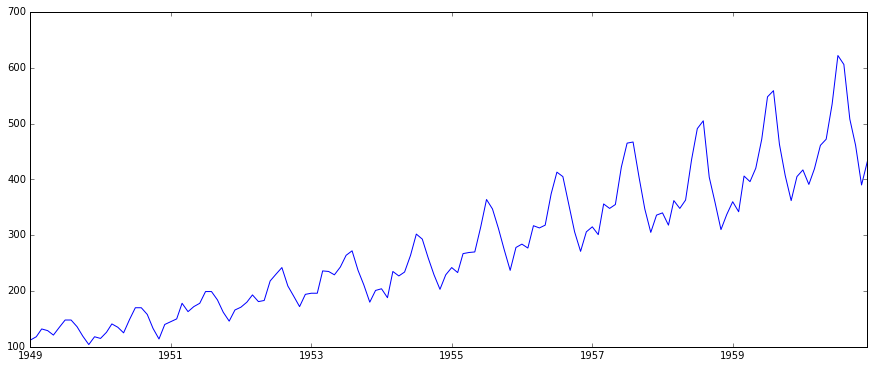

In [15]:
'''
Plotting our time series data
'''
plt.plot(ts)

In [16]:
'''
Visually checking rolling statistics and performing the Dickey-Fuller tes
'''
from statsmodels.tsa.stattools import adfuller

def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, 
                    color='blue',
                    label='Original')
    mean = plt.plot(rolmean, 
                    color='red', 
                    label='Rolling Mean')
    std = plt.plot(rolstd, 
                   color='black', 
                   label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print 'Results of Dickey-Fuller Test:'
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic',
                                             'p-value',
                                             '#Lags Used',
                                             'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print dfoutput

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


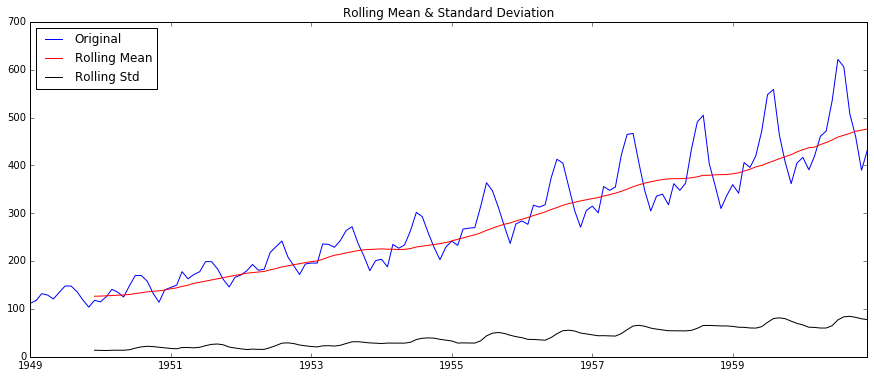

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [17]:
# Running function for the input series
test_stationarity(ts)

Though the variation in standard deviation is small, **mean is clearly increasing with time** and this is not a stationary series. 

Also, the **test statistic is way more than the critical values**. Note that the signed values should be compared and not the absolute values.

`Test Statistic = 0.815369
Critical Value (5%) = -2.884042
Critical Value (1%) = -3.481682
Critical Value (10%) = -2.578770`

**If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary but in this case the opposite is true, hence the data is not stationary.**

# Step 3: Making the time series data stationary #

There are 2 major reasons behind non-stationaruty of a TS:

1. **Trend** – varying mean over time. For eg, in this case we saw that on average, the number of passengers was growing over time.
2. ** Seasonality**  – variations at specific time-frames. eg people might have a tendency to buy cars in a particular month because of pay increment or festivals.

Steps:

* The underlying principle is to model or **estimate the trend and seasonality in the series.**
* **Remove those from the series** to get a stationary series. Then statistical forecasting techniques can be implemented on this series. 
* The final step would be to **convert the forecasted values into the original scale** by applying trend and seasonality constraints back.

## Step 3.1: Estimating & Eliminating Trend ##

One of the first tricks to reduce trend can be **transformation**. For example, in this case we can clearly see that the there is a significant positive trend. So we can apply **transformation which penalizes higher values more than smaller values. These can be taking a log, square root, cube root, etc**. Lets take a log transform.

We can use some techniques to estimate or model this trend and then remove it from the series. There can be many ways of doing it and some of most commonly used are:

* Aggregation – taking average for a time period like monthly/weekly averages
* Smoothing – taking rolling averages(Smoothing refers to taking rolling estimates, i.e. considering the past few instances.)
* Polynomial Fitting – fit a regression model

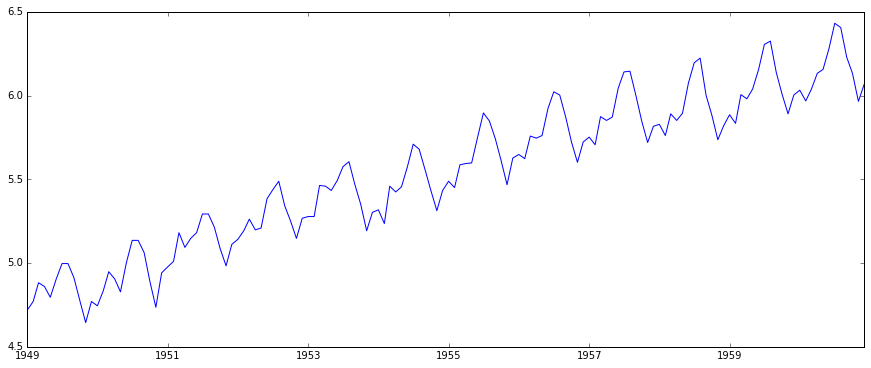

In [18]:
'''
Transformation - applying log transform
'''
ts_log = np.log(ts)
plt.plot(ts_log)

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()


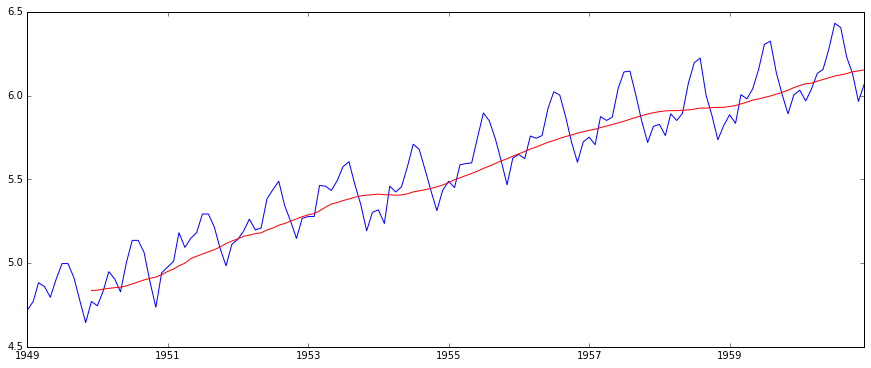

In [19]:
'''
Smoothing - we take average of ‘k’ consecutive values depending on the frequency of time series. 
Here we can take the average over the past 1 year, i.e. last 12 values. 
Pandas has specific functions defined for determining rolling statistics.
'''
moving_avg = pd.rolling_mean(ts_log,12)
plt.plot(ts_log)
plt.plot(moving_avg, color='red')

The red line shows the rolling mean. 

Lets subtract this from the original series. 

Note that since we are taking average of last 12 values, rolling mean is not defined for first 11 values. This can be observed as follows:

In [21]:
'''
Subtracting transformed rolling mean from original series
'''
ts_log_moving_avg_diff = ts_log - moving_avg

# Rolling mean is not defined for first 11 values.
ts_log_moving_avg_diff.head(15)

Month
1949-01-01         NaN
1949-02-01         NaN
1949-03-01         NaN
1949-04-01         NaN
1949-05-01         NaN
1949-06-01         NaN
1949-07-01         NaN
1949-08-01         NaN
1949-09-01         NaN
1949-10-01         NaN
1949-11-01         NaN
1949-12-01   -0.065494
1950-01-01   -0.093449
1950-02-01   -0.007566
1950-03-01    0.099416
Name: #Passengers, dtype: float64

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


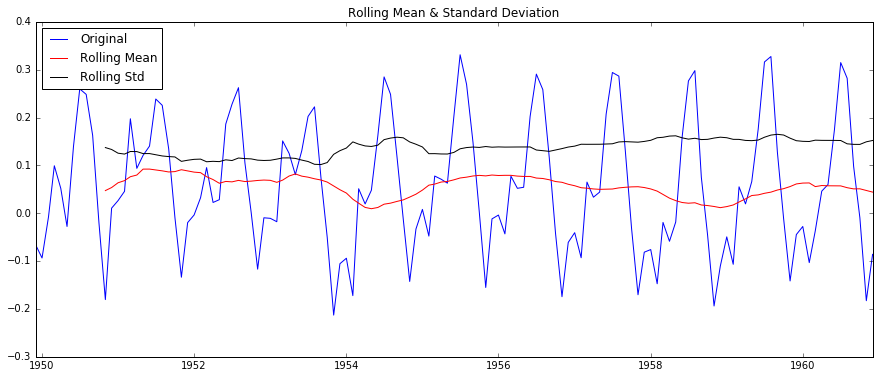

Results of Dickey-Fuller Test:
Test Statistic                  -3.162908
p-value                          0.022235
#Lags Used                      13.000000
Number of Observations Used    119.000000
Critical Value (5%)             -2.886151
Critical Value (1%)             -3.486535
Critical Value (10%)            -2.579896
dtype: float64


In [22]:
'''
Drop NaN values and check the plots to test stationarity.
'''
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

The rolling values appear to be varying slightly but there is no specific trend. 

**Also, the test statistic is smaller than the 5% critical values so we can say with 95% confidence that this is a stationary series. **

** Drawback with this approach: **

* Time-period has to be strictly defined. In this case we can take yearly averages but in complex situations like forecasting a stock price, its difficult to come up with a number. 

** Solution: **

Take a ‘weighted moving average’ where **more recent values are given a higher weight**. A way to do this is an exponentially weighted moving average where weights are assigned to all the previous values with a decay factor

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pd.ewm_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.ewm(halflife=12,ignore_na=False,min_periods=0,adjust=True).mean()


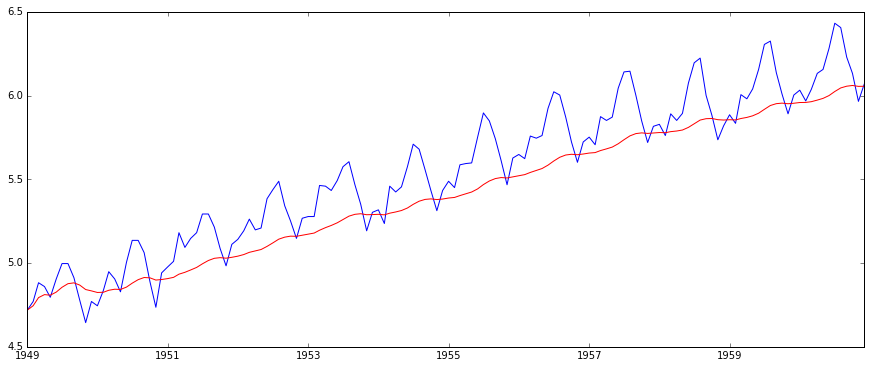

In [23]:
'''
weighted moving average using pandas 'ewma'

parameter ‘halflife’ is used to define the amount of exponential decay.
'''
expwighted_avg = pd.ewma(ts_log, 
                         halflife=12)
plt.plot(ts_log)
plt.plot(expwighted_avg, color='red')

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


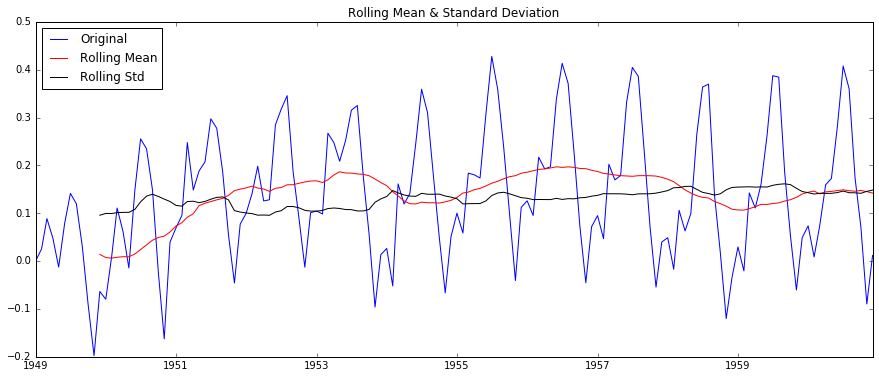

Results of Dickey-Fuller Test:
Test Statistic                  -3.601262
p-value                          0.005737
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (5%)             -2.884042
Critical Value (1%)             -3.481682
Critical Value (10%)            -2.578770
dtype: float64


In [24]:
'''
Checking stationarity using the exponential weighted moving average approach
'''
ts_log_ewma_diff = ts_log - expwighted_avg
test_stationarity(ts_log_ewma_diff)

This TS has even lesser variations in mean and standard deviation in magnitude. 

Also, the test statistic is smaller than the 1% critical value,

## Step 3.2: Estimitating and eliminating seasonality (and trend) ##

Two ways of removing trend and seasonality:

* Differencing – taking the differece with a particular time lag.
* Decomposition – modeling both trend and seasonality and removing them from the model.

** Differencing **

** Take the difference of the observation at a particular instant with that at the previous instant**. This mostly works well in improving stationarity. First order differencing can be done in Pandas using shift()

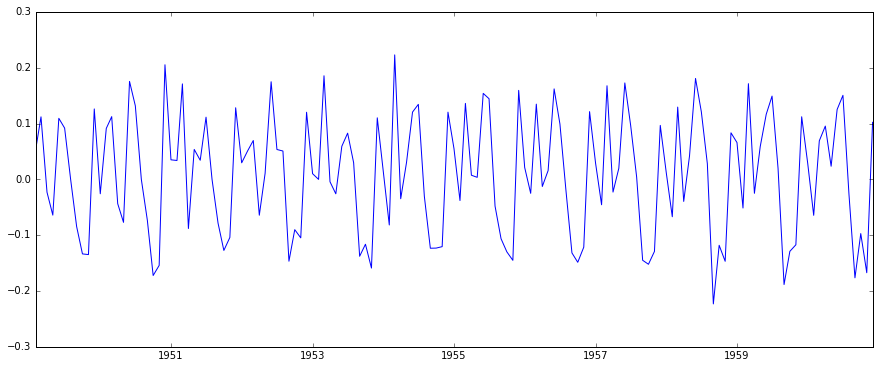

In [25]:
'''
Differencing to remove trends and seasonality
'''
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)

This appears to have reduced trend considerably. Lets verify using our plots:

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


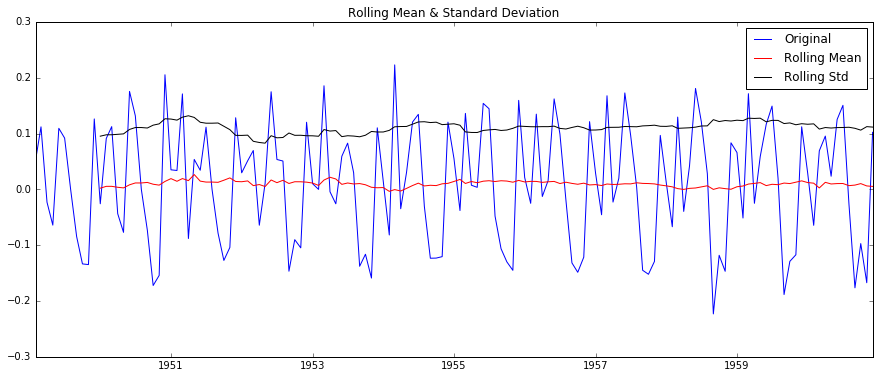

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (5%)             -2.884398
Critical Value (1%)             -3.482501
Critical Value (10%)            -2.578960
dtype: float64


In [26]:
'''
Verifying if trend has been removed using differencing
'''
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

We can see that the mean and std variations have small variations with time. 

** Also, the Dickey-Fuller test statistic is less than the 10% critical value, thus the TS is stationary with 90% confidence. **

** Decomposing **

Both trend and seasonality are modeled separately and the remaining part of the series is returned

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/statsmodels/tsa/filters/filtertools.py:28: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  return np.r_[[np.nan] * head, x, [np.nan] * tail]


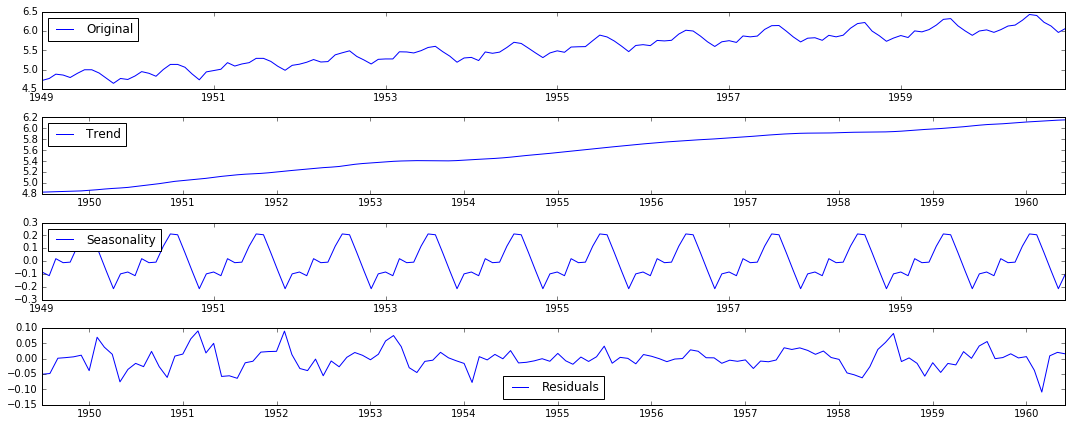

In [27]:
'''
Decomposing using 'seasonal_decompose'
'''
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(ts_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(ts_log, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).mean()
/Users/adarshnair/graphlab/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: FutureWarning: pd.rolling_std is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=12,center=False).std()


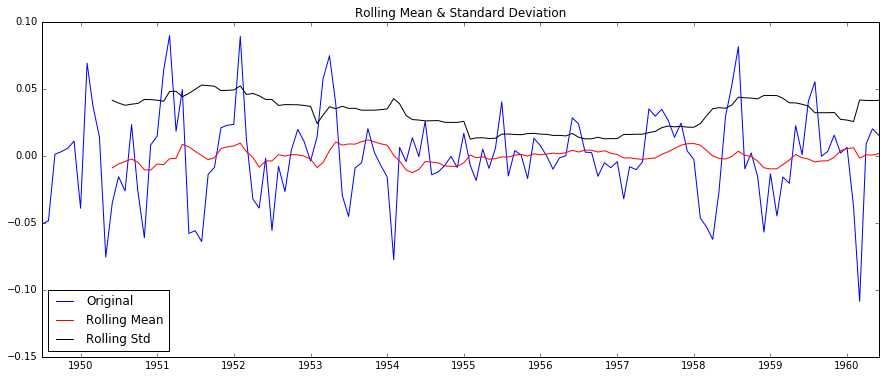

Results of Dickey-Fuller Test:
Test Statistic                -6.332387e+00
p-value                        2.885059e-08
#Lags Used                     9.000000e+00
Number of Observations Used    1.220000e+02
Critical Value (5%)           -2.885538e+00
Critical Value (1%)           -3.485122e+00
Critical Value (10%)          -2.579569e+00
dtype: float64


In [28]:
'''
Modeling the results using the residuals(with trend and seasonality removed)
'''
ts_log_decompose = residual

# Remove NaN
ts_log_decompose.dropna(inplace=True)

# Plots just the residuals
test_stationarity(ts_log_decompose)

** The Dickey-Fuller test statistic is significantly lower than the 1% critical value. So this TS is very close to stationary. **

# Step 4: Forecasting a time series #

Lets make model on the TS after **differencing** as it is a very popular technique. Also, its relatively easier to add noise and seasonality back into predicted residuals in this case. Having performed the trend and seasonality estimation techniques, there can be two situations:

* A strictly stationary series with **no dependence among the values**. This is the easy case wherein we can model the residuals as white noise. But this is very rare.
* A series with **significant dependence among values**. In this case we need to use some statistical models like ARIMA to forecast the data.

** ARIMA - Auto-Regressive Integrated Moving Averages **

The ARIMA forecasting for a stationary time series is nothing but a linear (like a linear regression) equation. The predictors depend on the parameters (p,d,q) of the ARIMA model:

* **Number of AR (Auto-Regressive) terms (p)**: AR terms are just lags of dependent variable. For instance if p is 5, the predictors for x(t) will be x(t-1)….x(t-5).
* **Number of MA (Moving Average) terms (q)**: MA terms are lagged forecast errors in prediction equation. For instance if q is 5, the predictors for x(t) will be e(t-1)….e(t-5) where e(i) is the difference between the moving average at ith instant and actual value.
* **Number of Differences (d)**: These are the number of nonseasonal differences, i.e. in this case we took the first order difference. So either we can pass that variable and put d=0 or pass the original variable and put d=1. Both will generate same results.

How to determine the value of ‘p’ and ‘q’. We use two plots to determine these numbers. 

* **Autocorrelation Function (ACF)**: It is a measure of the **correlation between the the TS with a lagged version of itself**. For instance at lag 5, ACF would compare series at time instant ‘t1’…’t2’ with series at instant ‘t1-5’…’t2-5’ (t1-5 and t2 being end points).
* **Partial Autocorrelation Function (PACF)**: This measures the **correlation between the TS with a lagged version of itself but after eliminating the variations already explained by the intervening comparisons**. Eg at lag 5, it will check the correlation but remove the effects already explained by lags 1 to 4.

In [29]:
'''
The ACF and PACF plots for the TS after differencing can be plotted.
'''
from statsmodels.tsa.stattools import acf, pacf

# Autocorrelation Function ACF
lag_acf = acf(ts_log_diff, 
              nlags=20)

# Partial Autocorrelation Function PACF
lag_pacf = pacf(ts_log_diff, 
                nlags=20, 
                method='ols')

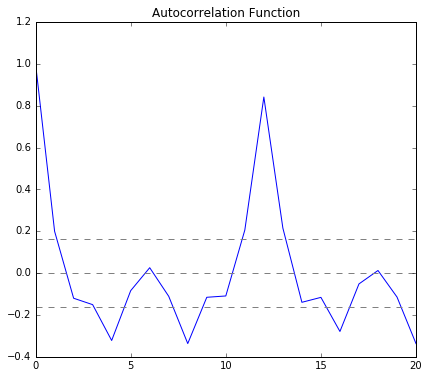

In [30]:
'''
Plot ACF
''' 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,
            linestyle='--',
            color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),
            linestyle='--',
            color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),
            linestyle='--',
            color='gray')
plt.title('Autocorrelation Function')

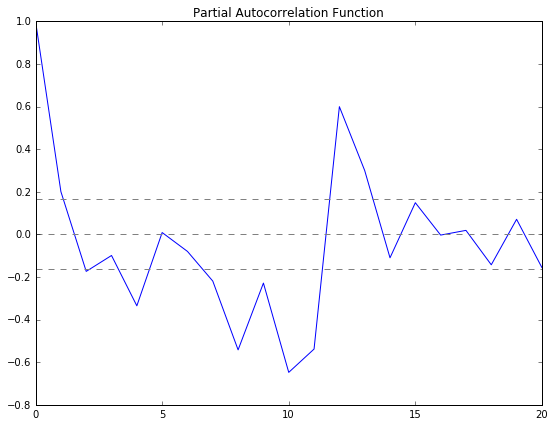

In [31]:
'''
Plot PACF
'''
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,
            linestyle='--',
            color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),
            linestyle='--',
            color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),
            linestyle='--',
            color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

**The two dotted lines on either sides of 0 are the confidence intervals.** These can be used to determine the ‘p’ and ‘q’ values as:

* p – The lag value where the **PACF chart crosses the upper confidence interval for the first time**. If you notice closely, in this case p = 2.
* q – The lag value where the **ACF chart crosses the upper confidence interval for the first time**. If you notice closely, in this case q = 2.

## Step 4.1 ARIMA Model ##

We will make 3 different ARIMA models considering individual as well as combined effects. The p,d,q values can be specified using the order argument of ARIMA which take a tuple (p,d,q). Lets model the 3 cases:

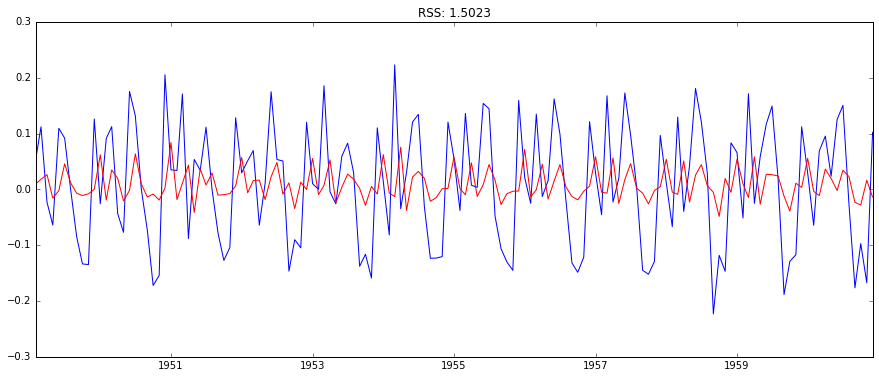

In [32]:
'''
AR Model - AR terms are just lags of the dependent variable. 

AR (Auto-Regressive) terms = p



(p,d,q) = order =(2, 1, 0)
'''
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts_log, 
              order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  

# Plot
plt.plot(ts_log_diff)
plt.plot(results_AR.fittedvalues, 
         color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-ts_log_diff)**2))

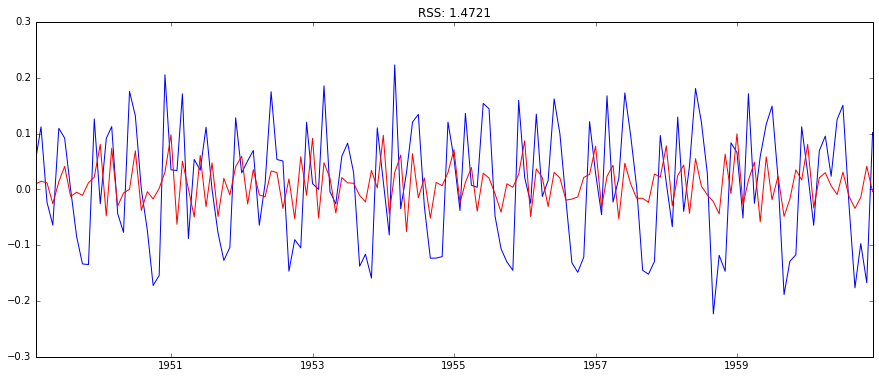

In [33]:
'''
MA Model

MA (Moving Average) terms (q): MA terms are lagged forecast errors in prediction equation

(p,d,q) = order =(0, 1, 2)
'''

model = ARIMA(ts_log, 
              order=(0, 1, 2))  
results_MA = model.fit(disp=-1)

# Plotting
plt.plot(ts_log_diff)
plt.plot(results_MA.fittedvalues, 
         color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-ts_log_diff)**2))

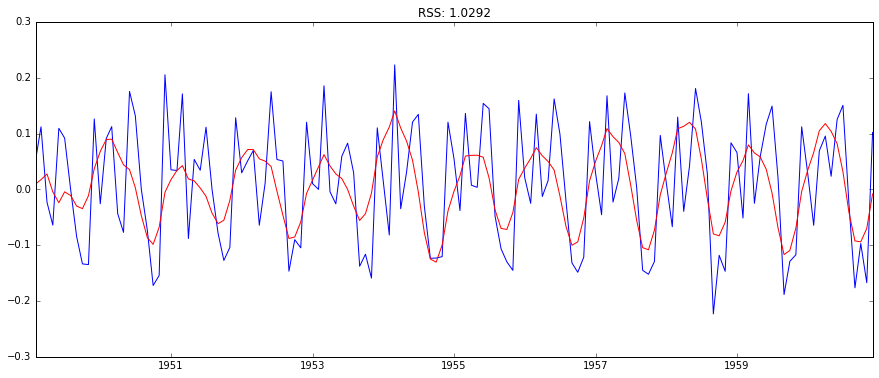

In [34]:
'''
Combined model 

(p,d,q) = order = (2, 1, 2)
'''
model = ARIMA(ts_log, 
              order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

# Plotting
plt.plot(ts_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-ts_log_diff)**2))

# Step 5: Converting back the values #

Since the combined model gave best result, lets scale it back to the original values and see how well it performs there. The steps are:

* Store the predicted results as a separate series and observe it.

In [35]:
'''
Store the predicted results as a separate series and observe it.
'''
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, 
                                   copy=True)
print predictions_ARIMA_diff.head()

Month
1949-02-01    0.009580
1949-03-01    0.017491
1949-04-01    0.027670
1949-05-01   -0.004521
1949-06-01   -0.023890
dtype: float64


These start from ‘1949-02-01’ and not the first month. This is because we took a lag by 1 and first element doesn’t have anything before it to subtract from.

 The way to convert the differencing to log scale is as follows:
 
1. Add these differences consecutively to the base number. To do this,  first determine the cumulative sum at index and then add it to the base number.
2. Next we’ve to add them to base number. Create a series with all values as base number and add the differences to it. Here the first element is base number itself and from thereon the values cumulatively added.
3. Last step is to take the exponent and compare with the original series.

In [36]:
'''
1. Find cumulative sum using cumsum()
'''
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()

print predictions_ARIMA_diff_cumsum.head()

Month
1949-02-01    0.009580
1949-03-01    0.027071
1949-04-01    0.054742
1949-05-01    0.050221
1949-06-01    0.026331
dtype: float64


In [37]:
'''
2. Next we’ve to add them to base number. Create a series with all values as base number and add the differences to it.

Here the first element is base number itself and from thereon the values cumulatively added.
'''
predictions_ARIMA_log = pd.Series(ts_log.ix[0], 
                                  index=ts_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,
                                                  fill_value=0)
predictions_ARIMA_log.head()

Month
1949-01-01    4.718499
1949-02-01    4.728079
1949-03-01    4.745570
1949-04-01    4.773241
1949-05-01    4.768720
dtype: float64

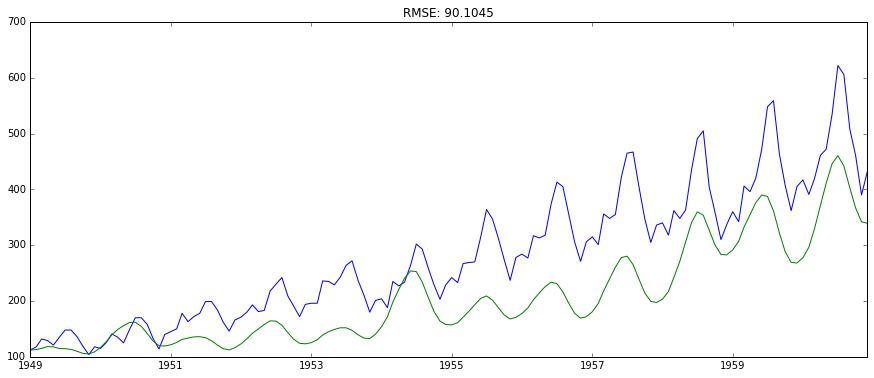

In [38]:
'''
3. Take the exponent and compare with the original series.
'''
# Take the exponent
predictions_ARIMA = np.exp(predictions_ARIMA_log)

# Plotting
plt.plot(ts)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-ts)**2)/len(ts)))

The above plot is our a forecast at the original scale.